In [1]:
"""
 Befor installing packages on anaconda it's better to create an environment such as:
 conda create --name graph_env python=3.10 -y
 conda activate graph_env

 
 Using following command will install some necessary packages on anaconda:
 conda install -y matplotlib=3.5.0 scikit-learn networkx=2.6.3 pytorch torchvision torchaudio -c pytorch

 In this environment the following versions of packages are installed:
 python=3.10
 pytorch=2.5.1
 scikit-learn=1.6.1
 numpy=1.26.4
 torch_geometric=2.6.1
 matplotlib=3.5.0
 karateclub=1.3.3

 After installation of pytorch you should install the following packages as well: 
 Pay attention to: torch-2.5.1+cpu: version of installed torch and we just using CPU
 pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.5.1+cpu.html

 We should also install the following package:
 pip install torch_geometric

 for the installation of karateclub: 
 pip install karateclub==1.3.3 --no-deps
 
 You may needs to install the following packages:
 pip install numpy<1.23.0 pandas<=1.3.5 decorator==4.4.2 gensim>=4.0.0 pygsp python-Levenshtein
 pip install gensim>=4.0.0
 pip install pygsp
 pip install "pandas<=1.3.5"
 pip install ipywidgets
 
 If you want to uninstall the created environment you can use the following commands:
 conda deactivate
 conda remove --name graph_env --all

 conda clean --all -y  # Clears cache and temporary files
 conda update -n base conda -y  # Updates Conda itself
 """

'\n Befor installing packages on anaconda it\'s better to create an environment such as:\n conda create --name graph_env python=3.10 -y\n conda activate graph_env\n\n \n Using following command will install some necessary packages on anaconda:\n conda install -y matplotlib=3.5.0 scikit-learn networkx=2.6.3 pytorch torchvision torchaudio -c pytorch\n\n In this environment the following versions of packages are installed:\n python=3.10\n pytorch=2.5.1\n scikit-learn=1.6.1\n numpy=1.26.4\n torch_geometric=2.6.1\n matplotlib=3.5.0\n karateclub=1.3.3\n\n After installation of pytorch you should install the following packages as well: \n Pay attention to: torch-2.5.1+cpu: version of installed torch and we just using CPU\n pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.5.1+cpu.html\n\n We should also install the following package:\n pip install torch_geometric\n\n for the installation of karateclub: \n pip install karateclub==1.3.3 -

In [2]:
import torch
print(torch.__version__)

2.5.1


In [3]:
import sklearn 
print(sklearn.__version__)

1.6.1


In [4]:
import numpy
print(numpy.__version__)

1.26.4


In [5]:
import torch_geometric
print(torch_geometric.__version__)

2.6.1


In [6]:
import matplotlib
print(matplotlib.__version__)

3.5.0


In [7]:
import karateclub
print(karateclub.__version__)

1.3.3


In [8]:
# At first we should load a graph.
# We used Zachary's karate club.
import networkx as nx
graph_karate_club = nx.karate_club_graph()

In [9]:
# 1. Basic Graph Information
print("=== Basic Graph Information ===")
print(f"Number of nodes: {graph_karate_club.number_of_nodes()}") #34 vertexes
print(f"Number of edges: {graph_karate_club.number_of_edges()}") # 78 edges (friendship)

=== Basic Graph Information ===
Number of nodes: 34
Number of edges: 78


In [10]:
# 2. Get the community structure of graph.
clubs = nx.get_node_attributes(graph_karate_club, 'club')

print("Attributes of graph (nodes and their affiliations): \n", clubs)
print("\nType of clubs is: ",type(clubs))
# We change type of 'clubs from dictionary to set and print.
# In set we don't have repetitive values. 
print(f"\n\n Two types of attributes that each node has: {set(clubs.values())}")  # {'Mr. Hi', 'Officer'} 
print(f"Mr. Hi's faction size: {list(clubs.values()).count('Mr. Hi')}") 
print(f"Officer's faction size: {list(clubs.values()).count('Officer')}") 

Attributes of graph (nodes and their affiliations): 
 {0: 'Mr. Hi', 1: 'Mr. Hi', 2: 'Mr. Hi', 3: 'Mr. Hi', 4: 'Mr. Hi', 5: 'Mr. Hi', 6: 'Mr. Hi', 7: 'Mr. Hi', 8: 'Mr. Hi', 9: 'Officer', 10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer', 16: 'Mr. Hi', 17: 'Mr. Hi', 18: 'Officer', 19: 'Mr. Hi', 20: 'Officer', 21: 'Mr. Hi', 22: 'Officer', 23: 'Officer', 24: 'Officer', 25: 'Officer', 26: 'Officer', 27: 'Officer', 28: 'Officer', 29: 'Officer', 30: 'Officer', 31: 'Officer', 32: 'Officer', 33: 'Officer'}

Type of clubs is:  <class 'dict'>


 Two types of attributes that each node has: {'Officer', 'Mr. Hi'}
Mr. Hi's faction size: 17
Officer's faction size: 17


In [11]:
# Now we want to chack some basic informatio of a vertex in graph_karate_club
# Choose a node to inspect (e.g., node 0 = instructor, node 33 = administrator)
node_id = 0 
# 1. Get basic node information
print(f"--- Node {node_id} Properties ---")
print(f"Degree: {graph_karate_club.degree[node_id]}")  # Number of connections
print(f"Club affiliation: {graph_karate_club.nodes[node_id]['club']}")  # 'Mr. Hi' or 'Officer'

--- Node 0 Properties ---
Degree: 16
Club affiliation: Mr. Hi


In [12]:
# 2. Get neighbors (directly connected nodes)
neighbors = list(graph_karate_club.neighbors(node_id))
print(f"Neighbors: {neighbors}")

Neighbors: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]


In [13]:
# Convert labels of nodes into 0 and 1 and store them in a list.
labels = [1 if graph_karate_club.nodes[i]['club'] == 'Officer' else 0 for i in graph_karate_club.nodes()]
print(f"labels in the for of 0 and 1 is: {labels}")

labels in the for of 0 and 1 is: [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


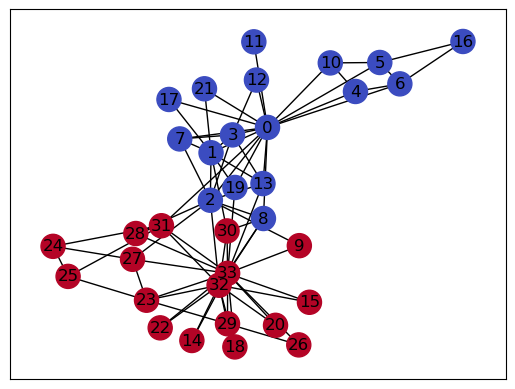

In [14]:
#Plot the Graph
layout_pos = nx.spring_layout(graph_karate_club)
nx.draw_networkx(graph_karate_club, pos = layout_pos, node_color=labels, cmap='coolwarm')

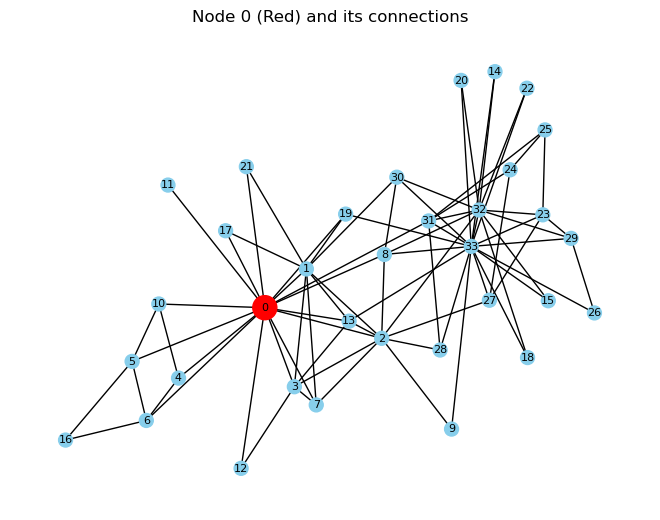

In [15]:
# 3. Visualize local connections
import matplotlib.pyplot as plt

#Highlight the target node and its connections
node_colors = ['red' if i == node_id else 'skyblue' for i in graph_karate_club.nodes()]
node_sizes = [300 if i == node_id else 100 for i in graph_karate_club.nodes()]

nx.draw(graph_karate_club, 
        with_labels=True,
        node_color=node_colors,
        node_size=node_sizes,
        font_size=8)

plt.title(f"Node {node_id} (Red) and its connections")
plt.show()

In [16]:
# 1. Initialize DeepWalk model
from karateclub import DeepWalk
DeepWalkModel = DeepWalk(walk_number=10, walk_length=40, dimensions=128)

In [17]:
# 2. Fit the model to the graph
DeepWalkModel.fit(graph_karate_club)

In [18]:
# 3. Fit the model to the graph
embedding = DeepWalkModel.get_embedding()
# We have 34 vertexes and in the creation of DeepWalk model we used 128 dimenstion for embedding of each vertex 
print('The embedding model has the following shape: ', embedding.shape)

The embedding model has the following shape:  (34, 128)


In [19]:
# 4. Visualize embeddings (2D PCA)
import sklearn

pca = sklearn.decomposition.PCA(n_components=2)
emb_2d = pca.fit_transform(embedding)

Text(0, 0.5, 'PCA Component 2')

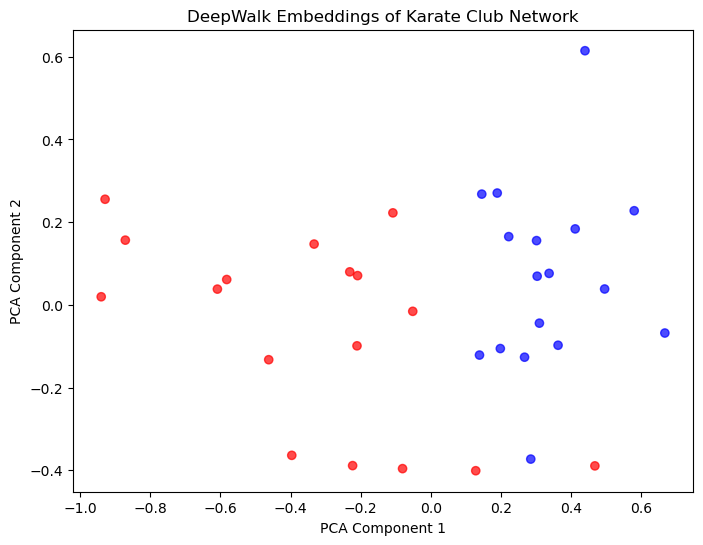

In [20]:
# Color nodes by their ground-truth 
import matplotlib.pyplot as plt

colors = ['red' if graph_karate_club.nodes[i]['club'] == 'Mr. Hi' else 'blue' for i in graph_karate_club.nodes()]
plt.figure(figsize=(8, 6))
plt.scatter(emb_2d[:, 0], emb_2d[:, 1], c=colors, alpha=0.7)
plt.title("DeepWalk Embeddings of Karate Club Network")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

In [21]:
# 5. Split data into train/test sets (80/20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    embedding,
    labels, 
    test_size=0.2,
    random_state = 42,      
)

In [22]:
# 6. Train a classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [23]:
# 6. Evaluate performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_preds = clf.predict(X_test)

print(f"Verified Test Accuracy: {accuracy_score(y_test, y_preds):.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_preds))

Verified Test Accuracy: 0.71

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.67      1.00      0.80         4

    accuracy                           0.71         7
   macro avg       0.83      0.67      0.65         7
weighted avg       0.81      0.71      0.67         7

